# Introduction to Data Science
## Homework 3

Student Name: Ramya Dhatri Vunikili

Student Netid: rdv253
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

PROOF:
<br/> Entropy:
\begin{align}
H(Y) & = \underset{y \in Y}\sum{P(y) \, \mathord{\cdot} \, log(P(y))} \\
& = -\mathop{\mathbb{E}}[log P(y)]
\end{align}
<br/> Conditional Entropy:
\begin{align}
H(Y|X) & = \underset{x \in X}\sum{P(X = x) \, \mathord{\cdot} \, H(Y | X = x)} \\
& = \underset{x \in X}\sum{P(X = x)}\underset{y \in Y}\sum{P(Y = y \, | \, X = x) \, \mathord{\cdot} \, log(P(Y = y\,|\,X = x))}\\
& = -\mathop{\mathbb{E}}[log P(y|x)]
\end{align}

<br/> Since taking an expectation is a linear operation we have,
\begin{align}
\mathop{\mathbb{E}}(X + Y) &= \mathop{\mathbb{E}}(X) + \mathop{\mathbb{E}}(Y) \\
\end{align}

<br/> Hence Information Gain can be given by
\begin{align}
H(Y) - H(Y|X) & = -\mathop{\mathbb{E}}[log P(y)] -[ -\mathop{\mathbb{E}}[log P(y\, | \, x)]]\\
& = \mathop{\mathbb{E}}[log P(y \, | \, x) - log P(y)] \\
& = \mathop{\mathbb{E}} [log \frac{P(y \, | \, x)}{P(y)}]
\end{align}
Since
\begin{align}
P(x,y) & = P(y|x) \, \mathord{\cdot} \, P(y) \\
\end{align}
\begin{align}
H(Y) - H(Y|X) & = \mathop{\mathbb{E}} [log \frac{P(y \, | \, x)}{P(y)}] \\
& =  \mathop{\mathbb{E}}[log \frac{P(x,y)}{P(x)\, \mathord{\cdot} \, P(y) }]\\
& = \underset{y \in Y} \sum{\underset{x \in X} \sum{P(x,y) \,\mathord{\cdot} \, log \frac{P(x,y)}{P(x)\, \mathord{\cdot} \, P(y)}}} \\
& = Mutual \, Information
\end{align}
<br/>
Hence, Mutual Information = Information Gain

In [418]:
%%latex
Entropy:
\begin{align}
H(Y) & = \underset{y \in Y}\sum{P(y) \, \mathord{\cdot} \, log(P(y))} \\
& = -\mathop{\mathbb{E}}[log P(y)]
\end{align}
<br/> Conditional Entropy:
\begin{align}
H(Y|X) & = \underset{x \in X}\sum{P(X = x) \, \mathord{\cdot} \, H(Y | X = x)} \\
& = \underset{x \in X}\sum{P(X = x)}\underset{y \in Y}\sum{P(Y = y \, | \, X = x) \, \mathord{\cdot} \, log(P(Y = y\,|\,X = x))}\\
& = -\mathop{\mathbb{E}}[log P(y|x)]
\end{align}

<br/> Since taking an expectation is a linear operation we have,
\begin{align}
\mathop{\mathbb{E}}(X + Y) &= \mathop{\mathbb{E}}(X) + \mathop{\mathbb{E}}(Y) \\
\end{align}

<br/> Hence Information Gain can be given by
\begin{align}
H(Y) - H(Y|X) & = -\mathop{\mathbb{E}}[log P(y)] -[ -\mathop{\mathbb{E}}[log P(y\, | \, x)]]\\
& = \mathop{\mathbb{E}}[log P(y \, | \, x) - log P(y)] \\
& = \mathop{\mathbb{E}} [log \frac{P(y \, | \, x)}{P(y)}]
\end{align}
Since
\begin{align}
P(x,y) & = P(y|x) \, \mathord{\cdot} \, P(y) \\
\end{align}
\begin{align}
H(Y) - H(Y|X) & = \mathop{\mathbb{E}} [log \frac{P(y \, | \, x)}{P(y)}] \\
& =  \mathop{\mathbb{E}}[log \frac{P(x,y)}{P(x)\, \mathord{\cdot} \, P(y) }]\\
& = \underset{y \in Y} \sum{\underset{x \in X} \sum{P(x,y) \,\mathord{\cdot} \, log \frac{P(x,y)}{P(x)\, \mathord{\cdot} \, P(y)}}} \\
& = Mutual \, Information
\end{align}
<br/>
Hence, Mutual Information = Information Gain

<IPython.core.display.Latex object>

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [35]:
import pandas as pd
import numpy as np

# Code here
#load dataset
#cwd = os.getcwd()
#datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
#f = datadir + 'cell2cell_data.txt'
data = pd.read_csv("cell2cell_data.csv", names = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 
               'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep'])
sampler = np.random.permutation(len(data))
train_df = data.take(sampler[:np.int(0.8*len(data))])
test_df = data.take(sampler[np.int(0.8*len(data)):])
#print (train_df.head())
#print (test_df.head())
#print (len(data), len(train_df), len(test_df))

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

If the probability of being in the sample is independent of X then the sample is unbiased and can be said it's randomly sampled. <br/>Implies, if P(Being in sample | X) = P(Being in sample) then it's said to be unbiased. Also, if the distribution of the sample is normal then it can be concluded that it's randomly sampled.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [81]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Code here
Y_train = train_df['churndep']
X_train = train_df.drop('churndep', 1)
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

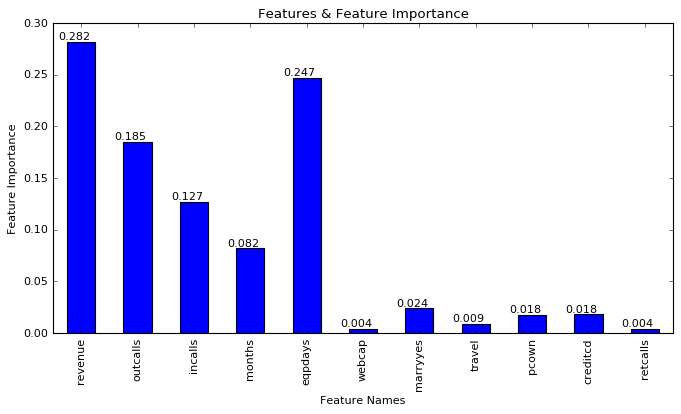

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

# Code here
feature_mi = dt.feature_importances_
feature_mi_dict = dict(zip(data.columns, feature_mi))
#print(data.columns)
#print (feature_mi)
#print (feature_mi_dict)

labels = data.columns
plt.figure(figsize=(10, 5))
ax = pd.Series.from_array(feature_mi).plot(kind='bar')
ax.set_title("Features & Feature Importance")
ax.set_xlabel("Feature Names")
ax.set_ylabel("Feature Importance")
ax.set_xticklabels(labels)
bars = ax.patches

for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/4, round(height, 3), round(height, 3), ha='center', va='bottom')


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

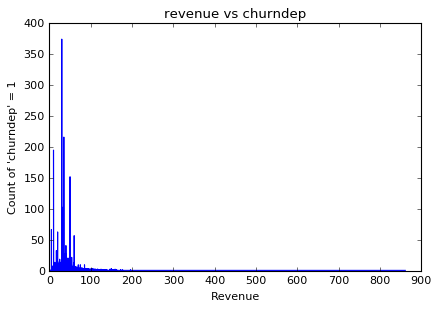

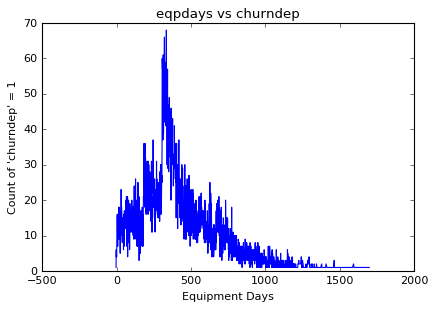

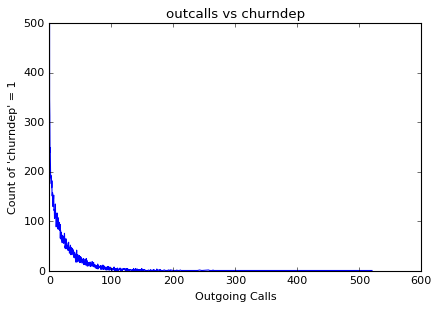

In [423]:
# Code/answer here
revenue_churn = train_df[train_df['churndep'] == 1].groupby(["revenue"]).size()
eqpdays_churn = train_df[train_df['churndep'] == 1].groupby(["eqpdays"]).size()
outcalls_churn = train_df[train_df['churndep'] == 1].groupby(["outcalls"]).size()

plt.plot(revenue_churn.keys(),revenue_churn.values)
plt.xlabel("Revenue")
plt.ylabel("Count of 'churndep' = 1")
plt.title("revenue vs churndep")
plt.show()
plt.plot(eqpdays_churn.keys(),eqpdays_churn.values)
plt.xlabel("Equipment Days")
plt.ylabel("Count of 'churndep' = 1")
plt.title("eqpdays vs churndep")
plt.show()
plt.plot(outcalls_churn.keys(),outcalls_churn.values)
plt.xlabel("Outgoing Calls")
plt.ylabel("Count of 'churndep' = 1")
plt.ylim(0, 500)
plt.title("outcalls vs churndep")
plt.show()

As observed from the plots, there is a negative relationship of these features with churn rate.

REVENUE:
<br/>The churn rate has spiked up among the customers with lower revenue (< 100). One inference might be that the company has recently increased the price of it's services making it better affordable only by customers with higher revenue. Thus, the customers might have chosen to switch to another company which offers products/services at a competitive price. 

EQPDAYS:
<br/>The second plot shows the frequency of churndep = 1 against eqpdays. It can be observed that the churn rate increases for a few initial eqpdays and then decreases. One possible explanation for this behaviour could be that customers who have recently bought the equipment might not be well acquainted with the usage instructions and hence facing a trouble operating the equipment. These customers are tend to give up using the equipment and also, maybe, leave the company. Whereas, the customers who have been using it for quite sometime are less prone to leave the company (It's a general behaviour that cutomers who stick with a company for a long time are expected to continue with the same company). Therefore, the churn rate is lower for customers with a high eqpdays.

OUTCALLS:
<br/>From the plot, it can be noted that churn rate decreases with more number of outgoing calls made. This could be due to the fact that the company provides less number of packages or high priced packages for customers who make less number of outgoing calls. And much better packages for customers who make calls.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [429]:
from sklearn.metrics import accuracy_score

# Code here
Y_test = test_df['churndep']
X_test = test_df.drop('churndep', 1)
Y_train_predict = dt.predict(X_train)
Y_test_predict = dt.predict(X_test)
train_accuracy = accuracy_score(Y_train_predict, Y_train)*100 
test_accuracy = accuracy_score(Y_test_predict, Y_test)*100
print ("Accuracy on training set: "+str(train_accuracy)+"%")
print ("Accuracy on test set: "+str(test_accuracy)+"%")

Accuracy on training set: 99.9843196287%
Accuracy on test set: 53.7631710988%


Accuracy On Training Set: 
As the model has seen all of the training dataset it is aware of the churn classification for any given combination of features from the training set. Hence, the accuracy is nearly 100%. But this kind of evaluation is flawed as it introduces overfitting. 

Accuracy On Test Set:
The model is now evaluated on an unseen dataset and hence tries to guess the 'churndep' value based on the probability/entropy values it learned from the training set. Possible reasons for low accuracy on test set include that the test set is very different from the training set and also maybe due to the fact that the decision tree parameters haven't been tuned well.

For a descriptive model, it is fine to test on the training set. But for a predictive model the test set should be different from the training set to have a true and accurate evaluation of the model.

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

(59.169593577521326, 9)


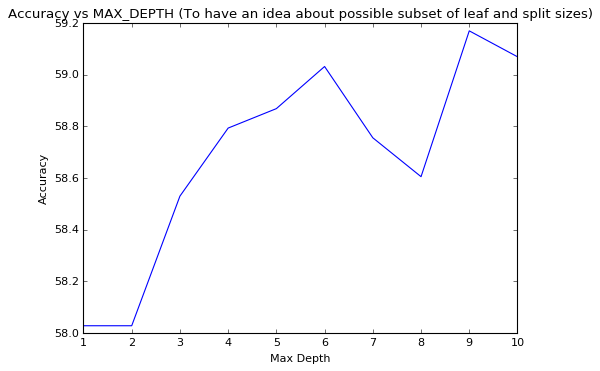

In [481]:
from sklearn import tree
import random
# Code here


accuracies = []
depth_accuracy = dict()
for x in range (1, 11):
    sp1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = x)
    sp1.fit(X_train, Y_train)
    Y_test_predict = sp1.predict(X_test)
    acc = accuracy_score(Y_test_predict, Y_test)*100
    accuracies.append(acc)
    depth_accuracy[x] = acc

f, ax = plt.subplots(figsize=(7,5))
ax.plot(range(1, 11), accuracies)
ax.set_title("Accuracy vs MAX_DEPTH (To have an idea about possible subset of leaf and split sizes)")
ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy")
best_max_depth = max(depth_accuracy, key=depth_accuracy.get)
print (depth_accuracy[best_max_depth], best_max_depth)


min_samples_split_values = random.sample(range(512, 2046),8)
min_samples_split_values.append(511)
min_samples_split_values.append(2047)
min_samples_split_values = np.sort(min_samples_split_values)
min_samples_leaf_values = random.sample(range(340, 350),10)
min_samples_leaf_values = np.sort(min_samples_leaf_values)

#To study the entropy and sample size relation in the existing tree
#Particularly, entropies around 0.5 and 0.1
with open("dt_classifier.txt", "w") as f:
    f = tree.export_graphviz(dt, out_file=f)
#sum = 0
#worst_split = []
#grep_ent = !grep "entropy = " dt_classifier.txt
#for key in range(0, len(grep_ent)-1):
   # worst_split.append(int (grep_ent[key].split("nsamples = ")[1].split("\\")[0]))
#print (len(grep_ent),sum)
#print max(worst_split)

Acc = 59.4330155544   leaf = 346
('779  59.42', 330)
('779  59.42', 331)
('779  59.42', 332)
('779  59.42', 333)
('779  59.42', 334)
('779  59.42', 335)
('779  59.42', 336)
('779  59.42', 337)
('779  59.42', 338)
('779  59.42', 339)
('779  59.42', 340)
('779  59.42', 341)
('779  59.42', 342)
('779  59.42', 343)
('779  59.42', 344)
('779  59.42', 345)
('779  59.43', 346)
('779  59.43', 347)
('779  59.43', 348)
('779  59.43', 349)
('779  59.43', 350)
('779  59.43', 351)
('779  59.43', 352)
('779  59.43', 353)
('779  59.43', 354)
('779  59.43', 355)
('779  59.43', 356)
('779  59.43', 357)
('779  59.22', 358)
('779  59.22', 359)


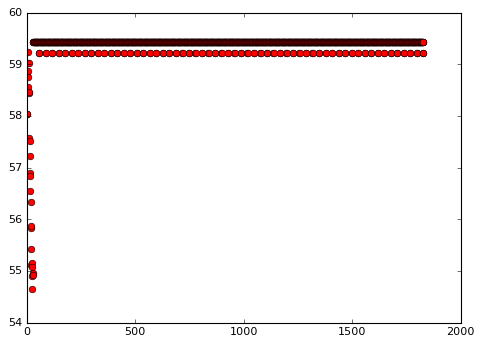

In [358]:
f, ax = plt.subplots(figsize=(7,5))
ax.plot(accuracies, 'ro')
best_leaf = max(best_accu, key=best_accu.get)
print ("Acc = "+str(best_accu[best_leaf])+"   "+"leaf = "+ str(best_leaf))
#for leaf in best_accu:
 #   print (best_accu[leaf], leaf)
best_accuracy = max(best_accu)
    
for best_leaf in best_split:
    print (best_split[best_leaf], best_leaf)

2\. Explain in words your reasoning for choosing the above ranges.

Initially, I did a dry run on different possible values of max_depth (range (1, no_of_features)) which gives the best accuracy. It has been found that the best accuracy occurs at max_depth = 9. However, max_depth is not a good criterion to use as it could stop splitting of a leaf with large no of samples on one side of the tree and with very less samples on the other side. 
<br/> Now that I've a fair idea of best max_depth, which is 9, I've calculated the no of possible nodes with this depth and removed the constraint of max_depth. In other words, maximum no of possible nodes should be around ((2^9) - 1) to ((2^11) - 1). This is because a tree with a depth d has atmost (2^d - 1) nodes.
<br/> Hence I picked 10 values in the range of (511, 2047) for min_split_size.
<br/>If we want a good decision tree it has to be well balanced. In case of a well balanced tree, the number of leaves would always be atleast one greater than the inner nodes of the tree (or in other words, splits of the tree). At the same time, I've taken care that the 'min_samples_split' size is not too small as it might lead to overfitting.
<br/> After this, I've studied the above exisiting decision tree for entropy values around 0.5 and 0.9 and observed their sample sizes by doing a grep on the output file containing decision tree. Upon noticing these sample sizes and keeping in mind the relation between nodes and leaves in a balanced tree I've shortlisted 30 values of min_samples_leaf values. Doing trial and error on this gave me 10 values for which the accuracy remains the same in that range, which is, 347 to 357.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(59.282488710486703, 1775)


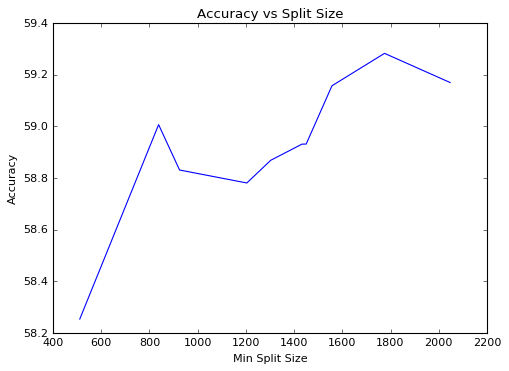

In [482]:
import matplotlib.pyplot as plt
%matplotlib inline

# Code here
accuracies = []
split_accuracy = dict()
leaves_accuracy = dict()
best_split = dict()
best_accu = dict()
for x in min_samples_split_values:
    sp1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = x)
    sp1.fit(X_train, Y_train)
    Y_test_predict = sp1.predict(X_test)
    acc = accuracy_score(Y_test_predict, Y_test)*100
    accuracies.append(acc)
    split_accuracy[x] = acc

f, ax = plt.subplots(figsize=(7,5))
ax.plot(min_samples_split_values, accuracies)
ax.set_title("Accuracy vs Split Size")
ax.set_xlabel("Min Split Size")
ax.set_ylabel("Accuracy")
best_split = max(split_accuracy, key=split_accuracy.get)
print (split_accuracy[best_split], best_split)

(59.570998494731562, 346)


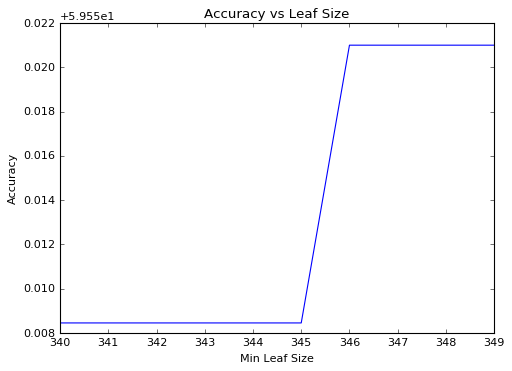

In [484]:
accuracies2 = []
for x in min_samples_leaf_values:
    sp1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = x)
    sp1.fit(X_train, Y_train)
    Y_test_predict = sp1.predict(X_test)
    acc = accuracy_score(Y_test_predict, Y_test)*100
    accuracies2.append(acc)
    leaves_accuracy[x] = acc

f, ax = plt.subplots(figsize=(7,5))
ax.plot(min_samples_leaf_values, accuracies2)
ax.set_title("Accuracy vs Leaf Size")
ax.set_xlabel("Min Leaf Size")
ax.set_ylabel("Accuracy")
best_leaf = max(leaves_accuracy, key=leaves_accuracy.get)
print (leaves_accuracy[best_leaf], best_leaf)

In [498]:
# Combinng Both The min_samples_split_values and min_samples_leaf_values
accuracies3 = []
best_accuracy_total_model = dict()
best_accuracy_leaf = dict()
for split in min_samples_split_values:
    for leaf in min_samples_leaf_values:
        sp1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = leaf, min_samples_split = split)
        sp1.fit(X_train, Y_train)
        Y_test_predict = sp1.predict(X_test)
        acc = accuracy_score(Y_test_predict, Y_test)*100
        accuracies3.append(acc)
        best_accuracy_total_model[leaf] = acc
        best_accuracy_leaf[leaf] = split


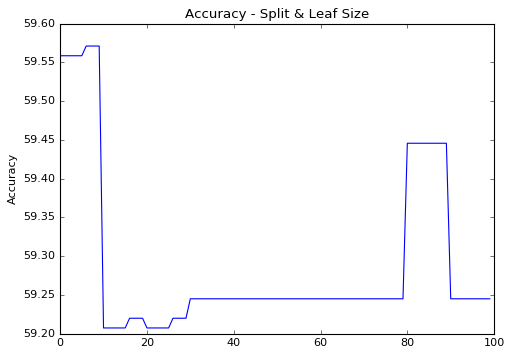

In [503]:
best_split_value = max(best_accuracy_total_model, key=best_accuracy_total_model.get)
f, ax = plt.subplots(figsize=(7,5))
ax.plot(accuracies3)
ax.set_title("Accuracy - Split & Leaf Size")
ax.set_ylabel("Accuracy")
best_leaf = max(best_accuracy_total_model, key=best_accuracy_total_model.get)

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [470]:
# Code here
best_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 511, min_samples_leaf = 347)
best_model.fit(X_train, Y_train)
Y_test_best = best_model.predict(X_test)
print ("Best accuracy obtained on the test set: "+str(accuracy_score(Y_test_best, Y_test)*100)+"%")
print ("min_samples_split = 511 and min_samples_leaf = 347")

Best accuracy obtained on the test set: 59.5709984947%
min_samples_split = 511 and min_samples_leaf = 347


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

The churn prediction model could give us better insights on what kind of customers tend to leave the company and hence help us in altering our products/services according to their necessities wherever required. In this model, it can be seen that a customer who makes low outgoing calls is more prone to leave the company. Hence, it gives us an opportunity to revise existing plans and lower the base charges (if profitable) for minimum usage to make these customers stick to the company. Also, if the company has made any recent changes in the price modeling then it could validate the anticipated customer behaviour post changes with this churn prediction model. Any un-anticipated customer behaviour can be dealt with accordingly. 